In [2]:
import pandas as pd

from repe.guard_dataloader import load_data_for_repre_guard


In [4]:
# number indicates how many samples per class were used to train
# directions, test_data, train_data = load_data_for_repre_guard(64, root_path="data/guard/")
# directions, test_data, train_data = load_data_for_repre_guard(128, root_path="data/guard/")
directions, test_data, train_data = load_data_for_repre_guard(16, root_path="data/guard/")

In [5]:
# 1st PC from PCA for each class
# layer_id -> layer id
# class_0_direction -> 1st PC for class 0, direction vector v1
# class_1_direction -> 1st PC for class 1, direction vector v2
# class_2_direction -> 1st PC for class 2, direction vector v3
directions.head()

,layer_id,class_0_direction,class_1_direction,class_2_direction
0,-1,"[-0.00022822918, 0.012093119, 0.013073234, -0....","[-0.0101627065, 0.008165172, -0.008036969, 0.0...","[-0.012145774, -0.009945369, 0.0049819546, -0...."
1,-2,"[0.0056989, 0.002778078, -0.0012031253, -0.011...","[0.012737165, -0.017108817, -0.008340168, -0.0...","[-0.009392623, -0.0055146473, -0.007010472, -0..."
2,-3,"[0.006481333, 0.0035372342, -0.0012195408, -0....","[0.0019491647, -0.017564954, -0.014040702, -0....","[-0.0036572523, -0.003711633, 0.002092137, -0...."
3,-4,"[0.006182858, 0.0015915052, 0.0072951317, -0.0...","[-0.0035377403, -0.016622083, -0.012155181, -0...","[-0.0049980427, -0.014008463, 0.0015394248, -0..."
4,-5,"[0.0027542405, -0.0051844427, 0.0072728596, -0...","[-0.007107893, -0.015425025, -0.0084505165, -0...","[-0.0028954302, -0.013137278, 0.0018330705, -0..."


In [6]:
# train data run through inference pipeline, this is maybe needed for training the "guard" model
# label -> true class label [0, 1, 2]
# text -> input text
# affinity_score_cls_0 -> affinity score for class 0 eg inner product b/w v1 and hidden states
# hidden_states_cls_0 -> hidden states at each layer for input in class 0
# affinity_score_cls_1 -> affinity score for class 1 eg inner product b/w v2 and hidden states
# hidden_states_cls_1 -> hidden states at each layer for input in class 1
# affinity_score_cls_2 -> affinity score for class 2 eg inner product b/w v3 and hidden states
# hidden_states_cls_2 -> hidden states at each layer for input in class 2
# affinity_scores -> dict of affinity scores for all classes and layers, e.g. {layer_id: (score_cls_0, score_cls_1, score_cls_2)}
train_data.head()

,label,text,affinity_score_cls_0,hidden_states_cls_0,affinity_score_cls_1,hidden_states_cls_1,affinity_score_cls_2,hidden_states_cls_2,affinity_scores
0,0,What is the origin of the term “court” as a re...,"{-1: 11.187014, -2: -5.02798, -3: -6.6214776, ...","{-1: [-2.6889648, -0.23144531, 3.1727905, 0.60...","{-1: 32.341923, -2: -7.732736, -3: -7.345295, ...","{-1: [-3.4261475, 2.2451172, 4.3867188, 1.1352...","{-1: -23.041176, -2: -13.490098, -3: -15.44948...","{-1: [-4.234375, -0.12158203, 2.0341797, 4.034...","{-1: [11.187014, 32.341923, -23.041176], -2: [..."
1,0,Where to find the laws regarding women's right...,"{-1: 19.006207, -2: -2.1897745, -3: -4.421277,...","{-1: [-3.974121, 0.10498047, 0.3143921, 2.2138...","{-1: 26.387827, -2: -5.7308297, -3: -5.3381324...","{-1: [-4.7113037, 2.581543, 1.5283203, 2.74365...","{-1: -19.992723, -2: -14.090582, -3: -15.85088...","{-1: [-5.5195312, 0.21484375, -0.82421875, 5.6...","{-1: [19.006207, 26.387827, -19.992723], -2: [..."
2,0,Do I have to send one of those emails after up...,"{-1: 9.462876, -2: -2.4536054, -3: -4.47541, -...","{-1: [-0.8432617, -0.7341614, 0.19158936, -0.5...","{-1: 37.968918, -2: -8.567727, -3: -7.999418, ...","{-1: [-1.5804443, 1.7424011, 1.4055176, -0.042...","{-1: -32.285397, -2: -13.444055, -3: -15.47983...","{-1: [-2.3886719, -0.6242981, -0.9470215, 2.85...","{-1: [9.462876, 37.968918, -32.285397], -2: [-..."
3,0,What happens if a debt is denominated in somet...,"{-1: -16.676895, -2: -9.126662, -3: -9.845307,...","{-1: [-0.66845703, 0.34570312, -1.3516235, 1.8...","{-1: 28.229649, -2: -6.899202, -3: -7.034072, ...","{-1: [-1.4056396, 2.8222656, -0.13769531, 2.39...","{-1: -13.888653, -2: -11.853157, -3: -13.55212...","{-1: [-2.2138672, 0.4555664, -2.4902344, 5.296...","{-1: [-16.676895, 28.229649, -13.888653], -2: ..."
4,0,Can POTUS threaten SCOTUS justices with forced...,"{-1: 18.399773, -2: 2.569918, -3: 0.07376509, ...","{-1: [-5.36084, 0.13964844, 1.2128296, -1.3286...","{-1: 30.420097, -2: -5.1846795, -3: -3.999842,...","{-1: [-6.0980225, 2.616211, 2.4267578, -0.7988...","{-1: 38.59925, -2: 3.8152404, -3: -0.6579156, ...","{-1: [-6.90625, 0.24951172, 0.07421875, 2.1000...","{-1: [18.399773, 30.420097, 38.59925], -2: [2...."


In [7]:
# test data run through inference pipeline, 10% of ID_test data + 10% of OOD_test data
# label -> true class label [0, 1, 2, 3] -> class 3 is OOD!
# text -> input text
# affinity_score_cls_0 -> affinity score for class 0 eg inner product b/w v1 and hidden states
# hidden_states_cls_0 -> hidden states at each layer for input in class 0
# affinity_score_cls_1 -> affinity score for class 1 eg inner product b/w v2 and hidden states
# hidden_states_cls_1 -> hidden states at each layer for input in class 1
# affinity_score_cls_2 -> affinity score for class 2 eg inner product b/w v3 and hidden states
# hidden_states_cls_2 -> hidden states at each layer for input in class 2
# affinity_scores -> dict of affinity scores for all classes and layers, e.g. {layer_id: (score_cls_0, score_cls_1, score_cls_2)}
test_data.head()

,label,text,affinity_score_cls_0,hidden_states_cls_0,affinity_score_cls_1,hidden_states_cls_1,affinity_score_cls_2,hidden_states_cls_2,affinity_scores
0,3,conservatives care post propaganda,"{-1: 27.310532, -2: 3.86673, -3: 1.6297268, -4...","{-1: [-7.2319336, -0.3828125, 0.977478, -0.994...","{-1: 1.3628634, -2: 2.7869713, -3: 2.623133, -...","{-1: [-7.969116, 2.09375, 2.1914062, -0.465209...","{-1: 1.2434323, -2: -7.489388, -3: -9.210437, ...","{-1: [-8.777344, -0.27294922, -0.16113281, 2.4...","{-1: [27.310532, 1.3628634, 1.2434323], -2: [3..."
1,3,what is the best tour to egypt?,"{-1: 8.221033, -2: -3.9759128, -3: -5.719731, ...","{-1: [-1.4272461, 1.5986328, 2.3798218, -1.993...","{-1: -2.1846344, -2: 1.8377961, -3: 0.9085678,...","{-1: [-2.1644287, 4.0751953, 3.59375, -1.46337...","{-1: -44.490322, -2: -19.120913, -3: -20.74948...","{-1: [-2.9726562, 1.7084961, 1.2412109, 1.4355...","{-1: [8.221033, -2.1846344, -44.490322], -2: [..."
2,3,who the f is this sand nigger dissing judge je...,"{-1: 38.931522, -2: 6.61706, -3: 4.1412373, -4...","{-1: [-5.751465, -0.18017578, 2.3134155, -0.69...","{-1: -8.409782, -2: 5.299623, -3: 5.1103296, -...","{-1: [-6.4886475, 2.2963867, 3.5273438, -0.161...","{-1: 11.480604, -2: -5.1878333, -3: -7.217545,...","{-1: [-7.296875, -0.0703125, 1.1748047, 2.7370...","{-1: [38.931522, -8.409782, 11.480604], -2: [6..."
3,3,<user> we are not all in this tohether you fuc...,"{-1: 35.094692, -2: 10.319831, -3: 8.960711, -...","{-1: [-1.0727539, -1.7207031, -1.1904907, -0.7...","{-1: -10.403464, -2: 6.876819, -3: 7.2829814, ...","{-1: [-1.8099365, 0.7558594, 0.0234375, -0.260...","{-1: 7.588819, -2: -1.4217867, -3: -2.2020595,...","{-1: [-2.618164, -1.6108398, -2.3291016, 2.637...","{-1: [35.094692, -10.403464, 7.588819], -2: [1..."
4,3,want shootings death listen aclu black lives m...,"{-1: 44.819843, -2: 6.0566087, -3: 3.6241395, ...","{-1: [-3.833496, -1.2126465, 1.4667358, -2.006...","{-1: -11.750793, -2: 5.3434453, -3: 4.658605, ...","{-1: [-4.5706787, 1.263916, 2.680664, -1.47705...","{-1: 8.84494, -2: -6.2983437, -3: -7.886154, -...","{-1: [-5.3789062, -1.1027832, 0.328125, 1.4218...","{-1: [44.819843, -11.750793, 8.84494], -2: [6...."


In [41]:
import numpy as np
def aggregate_scores(scores):
    return np.mean(scores), np.std(scores, ddof=1)

True label 0
Class 0 scores aggregated: (np.float32(-0.30829197), np.float32(2.974377))
Class 1 scores aggregated: (np.float32(-1.2731988), np.float32(6.870905))
Class 2 scores aggregated: (np.float32(-3.6516545), np.float32(7.5192103))


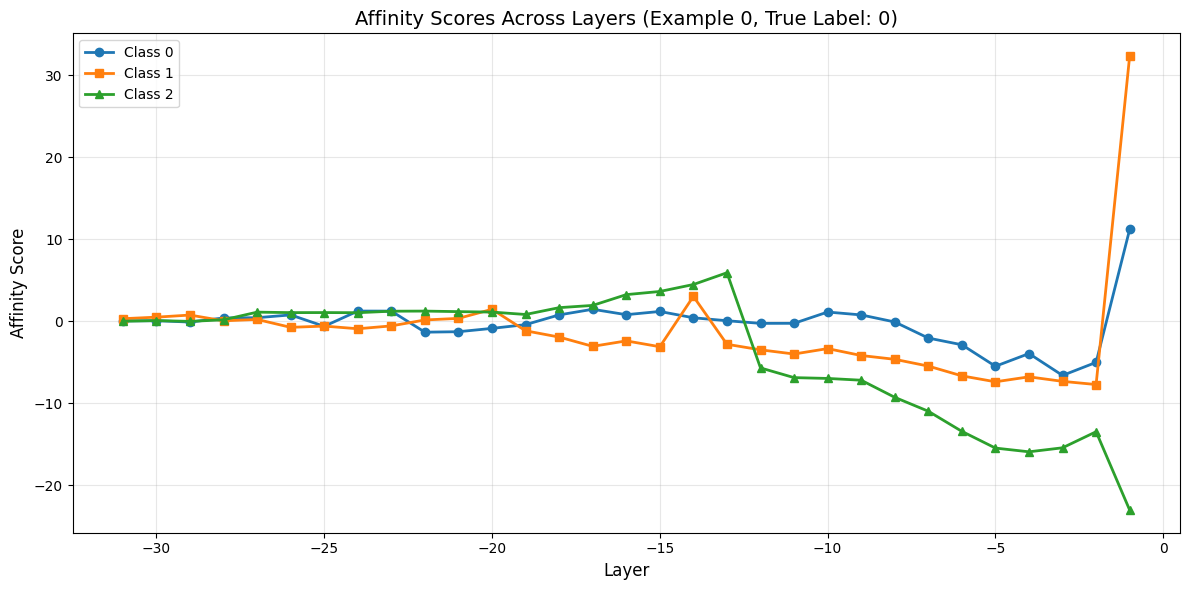

In [42]:
import matplotlib.pyplot as plt

# Get first example from train_data
example_idx = 0
example = train_data.iloc[example_idx]
true_label = example['label']
print("True label", true_label)

# Extract affinity scores for each class
affinity_cls_0 = example['affinity_score_cls_0']
affinity_cls_1 = example['affinity_score_cls_1']
affinity_cls_2 = example['affinity_score_cls_2']

# Get layers (assuming all classes have same layers)
layers = sorted(affinity_cls_0.keys())

# Extract scores per layer
scores_cls_0 = [affinity_cls_0[layer] for layer in layers]
scores_cls_1 = [affinity_cls_1[layer] for layer in layers]
scores_cls_2 = [affinity_cls_2[layer] for layer in layers]



print("Class 0 scores aggregated:", aggregate_scores(scores_cls_0))
print("Class 1 scores aggregated:", aggregate_scores(scores_cls_1))
print("Class 2 scores aggregated:", aggregate_scores(scores_cls_2))

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(layers, scores_cls_0, marker='o', label='Class 0', color='#1f77b4', linewidth=2)
plt.plot(layers, scores_cls_1, marker='s', label='Class 1', color='#ff7f0e', linewidth=2)
plt.plot(layers, scores_cls_2, marker='^', label='Class 2', color='#2ca02c', linewidth=2)

plt.xlabel('Layer', fontsize=12)
plt.ylabel('Affinity Score', fontsize=12)
plt.title(f'Affinity Scores Across Layers (Example {example_idx}, True Label: {example["label"]})', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Silly baseline

Simple predict the class with the biggest average affinity

In [43]:
def predict(row):
    affinity_cls_0 = row['affinity_score_cls_0']
    affinity_cls_1 = row['affinity_score_cls_1']
    affinity_cls_2 = row['affinity_score_cls_2']
    
    layers = sorted(affinity_cls_0.keys())
    
    scores_cls_0 = [affinity_cls_0[layer] for layer in layers]
    scores_cls_1 = [affinity_cls_1[layer] for layer in layers]
    scores_cls_2 = [affinity_cls_2[layer] for layer in layers]
    
    score_cls_0_mean, score_cls_0_std = aggregate_scores(scores_cls_0)
    score_cls_1_mean, score_cls_1_std = aggregate_scores(scores_cls_1)
    score_cls_2_mean, score_cls_2_std = aggregate_scores(scores_cls_2)
    
    scores = [score_cls_0_mean, score_cls_1_mean, score_cls_2_mean]

    return scores.index(max(scores))

In [44]:
# Apply predict to train data and compare with ground truth
train_data['predicted_label'] = train_data.apply(predict, axis=1)
train_accuracy = (train_data['predicted_label'] == train_data['label']).mean()
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

Train Accuracy: 58.33%


In [45]:
# Apply predict to test data and compare with ground truth
id_test_data = test_data[test_data['label'] != 3]
id_test_data['predicted_label'] = id_test_data.apply(predict, axis=1)
id_test_accuracy = (id_test_data['predicted_label'] == id_test_data['label']).mean()
print(f"ID Test Accuracy: {id_test_accuracy * 100:.2f}%")

ood_test_data = test_data[test_data['label'] == 3]
ood_test_data['predicted_label'] = ood_test_data.apply(predict, axis=1)
ood_test_accuracy = (ood_test_data['predicted_label'] == ood_test_data['label']).mean()
print(f"OOD Test Accuracy: {ood_test_accuracy * 100:.2f}%")

test_data['predicted_label'] = test_data.apply(predict, axis=1)
test_accuracy = (test_data['predicted_label'] == test_data['label']).mean()
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

ID Test Accuracy: 59.33%
OOD Test Accuracy: 0.00%
Test Accuracy: 23.78%


In [66]:
class BasicPredictor:
    def __init__(self, num_classes, ood_class_id=3, ood_threshold=2.0):
        self.class_means = np.zeros(num_classes)
        self.class_stddevs = np.zeros(num_classes)
        self.ood_class_id = ood_class_id
        self.ood_threshold = ood_threshold      


    def flatten_scores(self, row):
        affinity_cls_0 = row['affinity_score_cls_0']
        affinity_cls_1 = row['affinity_score_cls_1']
        affinity_cls_2 = row['affinity_score_cls_2']
    
        layers = sorted(affinity_cls_0.keys())
    
        scores_cls_0 = [affinity_cls_0[layer] for layer in layers]
        scores_cls_1 = [affinity_cls_1[layer] for layer in layers]
        scores_cls_2 = [affinity_cls_2[layer] for layer in layers]

        return [scores_cls_0, scores_cls_1, scores_cls_2]
    
    def fit(self, train_data):

        for _, row in train_data.iterrows():
            scores_by_class = self.flatten_scores(row)

            m0, sd0 = aggregate_scores(scores_by_class[0])
            m1, sd1 = aggregate_scores(scores_by_class[1])
            m2, sd2 = aggregate_scores(scores_by_class[2])

            self.class_means[0] += m0
            self.class_means[1] += m1
            self.class_means[2] += m2
            self.class_stddevs[0] += sd0
            self.class_stddevs[1] += sd1
            self.class_stddevs[2] += sd2

        self.class_means /= len(train_data)
        self.class_stddevs /= len(train_data)


    def ood_check(self, X, threshold=2.0):
        # Simple OOD check based on distance from class means
        distances = []
        for i in range(len(self.class_means)):
            m, sd = self.class_means[i], self.class_stddevs[i]
            distances.append(abs(X[i] - m) / (sd + 1e-6))  # Avoid division by zero
        min_distance = min(distances)
        # print(min_distance)
        return min_distance > threshold  # If distance is greater than threshold, consider OOD

    def predict(self, test_data):
        results = []
        for _, row in test_data.iterrows():
            pred = self.predict_single(row)
            results.append(pred)
        return np.array(results)

    def predict_single(self, row):
        scores_by_class = self.flatten_scores(row)
        test_means = [
            aggregate_scores(scores_by_class[0])[0],
            aggregate_scores(scores_by_class[1])[0],
            aggregate_scores(scores_by_class[2])[0],
        ]
        if self.ood_check(test_means, threshold=self.ood_threshold):
            return self.ood_class_id  # OOD class
        return np.argmax(test_means)

In [91]:
from collections import Counter
# Train
estimator = BasicPredictor(num_classes=3, ood_threshold=0.1)
estimator.fit(train_data)


ID_accuracy = (estimator.predict(id_test_data) == id_test_data['label']).mean()
print("ID Test Accuracy:", ID_accuracy)

OOD_accuracy = (estimator.predict(ood_test_data) == ood_test_data['label']).mean()
print("OOD Test Accuracy:", OOD_accuracy)

# Test
y_pred = estimator.predict(test_data)
accuracy = (y_pred == test_data['label']).mean()
print(Counter(y_pred))
print(accuracy)



ID Test Accuracy: 0.3088888888888889
OOD Test Accuracy: 0.5141158989598811
Counter({np.int64(3): 1216, np.int64(0): 862, np.int64(1): 168})
0.43187889581478184
